In [ ]:
import pandas as pd

def trade_tariffs(input_path, output_path):
    # Import data
    df = pd.read_csv(input_path)

    # Filter for 'Trade - S1 - Tariffs'
    df_trade_tariffs = df[df['Indicator Name'] == 'Trade - S1 - Tariffs']

    # Filter for years 1990-2010
    columns_to_keep = ['Country Name'] + [str(year) for year in range(1990, 2010)]
    df_trade_tariffs = df_trade_tariffs[columns_to_keep]

    # Cleaning: Drop countries with any missing data
    df_trade_tariffs_clean = df_trade_tariffs.dropna()

    # Save the cleaned data
    df_trade_tariffs_clean.to_csv(output_path, index=False)

    # Return the cleaned DataFrame
    return df_trade_tariffs_clean

# Create new cvs for cleaned data
df_trade_tariffs = trade_tariffs(
    '../../../data/raw/StructuralReform_IMF.csv', 
    '../../../data/clean/TradeTariffsClean_IMF.csv'
)


In [31]:
import pandas as pd

def external_finance(input_path, output_path):
    # Import data
    df = pd.read_csv(input_path)

    # Filter for 'External finance - Overall'
    df_external_finance = df[df['Indicator Name'] == 'External finance - Overall']

    # Filter for years 1990-2010
    columns_to_keep = ['Country Name'] + [str(year) for year in range(1990, 2011)]
    df_external_finance = df_external_finance[columns_to_keep]

    # Cleaning: Drop countries with any missing data
    df_external_finance_clean = df_external_finance.dropna()

    # Save the cleaned data
    df_external_finance_clean.to_csv(output_path, index=False)

    # Return the cleaned DataFrame
    return df_external_finance_clean

# Create new cvs for cleaned data
df_external_finance = external_finance(
    '../../../data/raw/StructuralReform_IMF.csv', 
    '../../../data/clean/ExternalFinanceClean_IMF.csv'
)


In [33]:
# Melt Trade Tariffs data
df_trade_tariffs_melted = df_trade_tariffs.melt(
    id_vars=['Country Name'], 
    var_name='Year', 
    value_name='Trade_Tariffs'
)

# Melt External Finance data
df_external_finance_melted = df_external_finance.melt(
    id_vars=['Country Name'], 
    var_name='Year', 
    value_name='External_Finance'
)

# Merge the two melted DataFrames
df_merged = pd.merge(
    df_trade_tariffs_melted,
    df_external_finance_melted,
    on=['Country Name', 'Year'],
    how='inner'
)

# Convert 'Year' column to integer 
df_merged['Year'] = df_merged['Year'].astype(int)

# Create new cvs for cleaned data
df_merged.to_csv('../../../data/clean/Merged_Trade_ExternalFinance_IMF.csv', index=False)



In [ ]:
import pandas as pd

# Load CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high) data
df_CPIA = pd.read_csv("../../../data/raw/WB_CPIA.csv")

# Keep only 'Country Name' and year columns (2005–2015)
columns_to_keep = ['Country Name'] + [col for col in df_CPIA.columns if any(str(year) in col for year in range(2005, 2016))]
df_CPIA = df_CPIA[columns_to_keep]
df_CPIA.columns = ['Country Name'] + [str(year) for year in range(2005, 2016)]
print(df_CPIA.columns.tolist())

# Reshape to long format
df_CPIA_Clean = df_CPIA.melt(id_vars="Country Name", var_name="Year", value_name="CPIA_Value")

# Extract clean 4-digit year
df_CPIA_Clean["Year"] = df_CPIA_Clean["Year"].str.extract(r'(\d{4})')

# Replace ".." with NaN and convert to numeric
df_CPIA_Clean["CPIA_Value"] = pd.to_numeric(df_CPIA_Clean["CPIA_Value"], errors='coerce')

# Drop rows with missing values
df_CPIA_Clean = df_CPIA_Clean.dropna(subset=["CPIA_Value"])

# Save cleaned file
df_CPIA_Clean.to_csv("../../../data/clean/WB_CPIA_Clean.csv", index=False)

# Count how many unique countries
num_countries = df_CPIA_Clean["Country Name"].nunique()

# Count how many unique years
num_years = df_CPIA_Clean["Year"].nunique()

print(f"Number of countries: {num_countries}")
print(f"Number of years: {num_years}")


['Country Name', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
Number of countries: 128
Number of years: 11


In [ ]:
import pandas as pd

# Load Wage and salaried workers, total (% of total employment) (modeled ILO estimate) data (skip metadata rows)
df_labor = pd.read_csv("../../../data/raw/ILOWB_laborwage.csv", skiprows=4)

# Keep only Country Name and year columns (2005–2015)
columns_to_keep = ['Country Name'] + [col for col in df_labor.columns if any(str(year) in col for year in range(2005, 2016))]
df_labor = df_labor[columns_to_keep]
df_labor.columns = ['Country Name'] + [str(year) for year in range(2005, 2016)]
print(df_labor.columns.tolist())

# Reshape to long format
df_labor_clean = df_labor.melt(id_vars="Country Name", var_name="Year", value_name="Wage_Value")

# Convert wage values to numeric, handling ".." and blanks
df_labor_clean["Wage_Value"] = pd.to_numeric(df_labor_clean["Wage_Value"], errors='coerce')

# Drop rows with missing values
df_labor_clean = df_labor_clean.dropna(subset=["Wage_Value"])

# Save cleaned file
df_labor_clean.to_csv("../../../data/clean/ILOWB_laborwage_Clean.csv", index=False)

# Count how many unique countries
num_countries = df_labor_clean["Country Name"].nunique()

# Count how many unique years
num_years = df_labor_clean["Year"].nunique()

print(f"Number of countries: {num_countries}")
print(f"Number of years: {num_years}")


['Country Name', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
Number of countries: 235
Number of years: 11


In [44]:
import pandas as pd

# Load GDP per Capita data
df_gdp = pd.read_csv("../../../data/raw/OWD_GDP.csv")

# Rename columns 
df_gdp = df_gdp.rename(columns={
    "Entity": "Country Name",
    "Year": "Year",
    "GDP per capita, PPP (constant 2021 international $)": "GDP_per_capita"
})

# Keep only necessary columns
df_gdp = df_gdp[["Country Name", "Year", "GDP_per_capita"]]
df_gdp = df_gdp[df_gdp["Year"].between(2005, 2015)]

# Drop rows with missing values
df_gdp = df_gdp.dropna(subset=["GDP_per_capita"])

# Save cleaned file
df_gdp.to_csv("../../../data/clean/OWD_GDP_Clean.csv", index=False)

# Count how many unique countries
num_countries = df_gdp["Country Name"].nunique()

# Count how many unique years
num_years = df_gdp["Year"].nunique()

print(f"Number of countries: {num_countries}")
print(f"Number of years: {num_years}")

Number of countries: 213
Number of years: 11


In [34]:
import pandas as pd

# Load Inflation of consumer prices data
df_inflation = pd.read_csv("../../../data/raw/OWD_inflation.csv")

# Rename columns 
df_inflation = df_inflation.rename(columns={
    "Entity": "Country Name",
    "Year": "Year",
    "Inflation, consumer prices (annual %)": "Inflation"
})

# Keep only necessary columns
df_inflation = df_inflation[["Country Name", "Year", "Inflation"]]
df_inflation = df_inflation[df_inflation["Year"].between(2005, 2015)]

# Drop rows with missing values
df_inflation = df_inflation.dropna(subset=["Inflation"])

# Save cleaned file
df_inflation.to_csv("../../../data/clean/OWD_inflation_Clean.csv", index=False)

# Count how many unique countries
num_countries = df_inflation["Country Name"].nunique()

# Count how many unique years
num_years = df_inflation["Year"].nunique()

print(f"Number of countries: {num_countries}")
print(f"Number of years: {num_years}")


Number of countries: 206
Number of years: 11


In [35]:
import pandas as pd

# Load average schooling year data
df_schooling = pd.read_csv("../../../data/raw/OWD_schoolingyear.csv")

# Rename columns 
df_schooling = df_schooling.rename(columns={
    "Entity": "Country Name",
    "Year": "Year",
    "Average years of schooling": "Schooling_Years"
})

# Keep only necessary columns
df_schooling = df_schooling[["Country Name", "Year", "Schooling_Years"]]
df_schooling = df_schooling[df_schooling["Year"].between(2005, 2015)]

# Drop rows with missing values
df_schooling = df_schooling.dropna(subset=["Schooling_Years"])

# Save cleaned file
df_schooling.to_csv("../../../data/clean/OWD_schoolingyear_Clean.csv", index=False)

# Count how many unique countries
num_countries = df_schooling["Country Name"].nunique()

# Count how many unique years
num_years = df_schooling["Year"].nunique()

print(f"Number of countries: {num_countries}")
print(f"Number of years: {num_years}")


Number of countries: 214
Number of years: 11


In [54]:
## MERGE CLEAN DATA
import pandas as pd
import numpy as np

# Load all clean datasets
df_cpia = pd.read_csv("../../../data/clean/WB_CPIA_Clean.csv")
df_wage = pd.read_csv("../../../data/clean/ILOWB_laborwage_Clean.csv")
df_gdp = pd.read_csv("../../../data/clean/OWD_GDP_Clean.csv")
df_inflation = pd.read_csv("../../../data/clean/OWD_inflation_Clean.csv")
df_school = pd.read_csv("../../../data/clean/OWD_schoolingyear_Clean.csv")

# Merge all clean datasets on Country Name and Year
df_merged = df_cpia.merge(df_wage, on=["Country Name", "Year"], how="inner")
df_merged = df_merged.merge(df_gdp, on=["Country Name", "Year"], how="inner")
df_merged = df_merged.merge(df_inflation, on=["Country Name", "Year"], how="inner")
df_merged = df_merged.merge(df_school, on=["Country Name", "Year"], how="inner")

# Remove 'World' entry
df_merged = df_merged[df_merged["Country Name"] != "World"]

# GDP Transforming (because the original data is heavily right-skewed)
df_merged["log_GDP"] = np.log(df_merged["GDP_per_capita"])

# Wage Transforming (just to try maybe it willl give me better end result)
df_merged["log_Wage"] = np.log(df_merged["Wage_Value"])

# Inflation Outliers Handling (because the original data have countries with hyper inflation)
df_merged["Inflation_Capped"] = df_merged["Inflation"].clip(upper=50)

# Save cleaned file
df_merged.to_csv("../../../data/clean/Merge_CPIAvsWAGE.csv", index=False)

## OVERVIEW OF DATA
# Count how many unique countries
num_countries = df_merged["Country Name"].nunique()

# Count how many unique years
num_years = df_merged["Year"].nunique()

print(f"Number of countries: {num_countries}")
print(f"Number of years: {num_years}")

# Basic structure
print(df_merged.info())

# Summary statistics
print(df_merged.describe())

# Check for missing values
print(df_merged.isnull().sum())


Number of countries: 65
Number of years: 11
<class 'pandas.core.frame.DataFrame'>
Index: 631 entries, 0 to 640
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      631 non-null    object 
 1   Year              631 non-null    int64  
 2   CPIA_Value        631 non-null    float64
 3   Wage_Value        631 non-null    float64
 4   GDP_per_capita    631 non-null    float64
 5   Inflation         631 non-null    float64
 6   Schooling_Years   631 non-null    float64
 7   log_GDP           631 non-null    float64
 8   log_Wage          631 non-null    float64
 9   Inflation_Capped  631 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 54.2+ KB
None
              Year  CPIA_Value  Wage_Value  GDP_per_capita   Inflation  \
count   631.000000  631.000000  631.000000      631.000000  631.000000   
mean   2010.009509    2.858162   31.243294     4765.946000    7.335532   
st

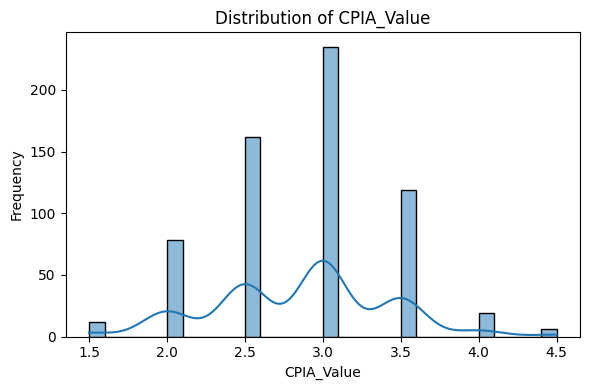

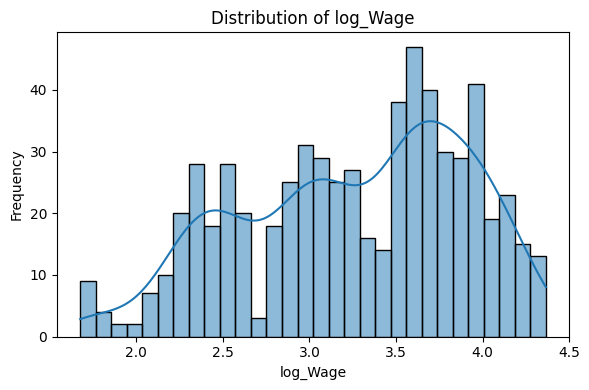

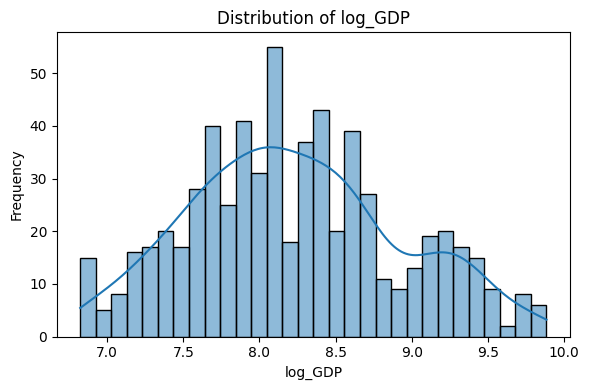

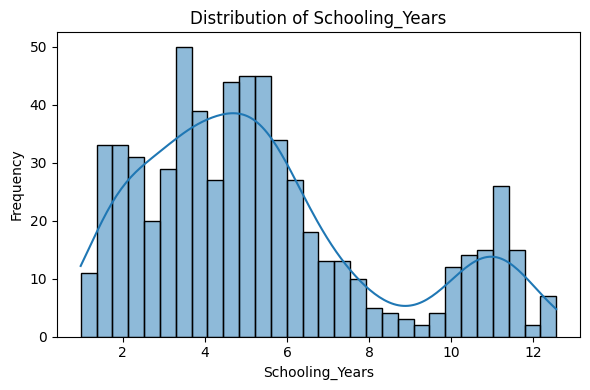

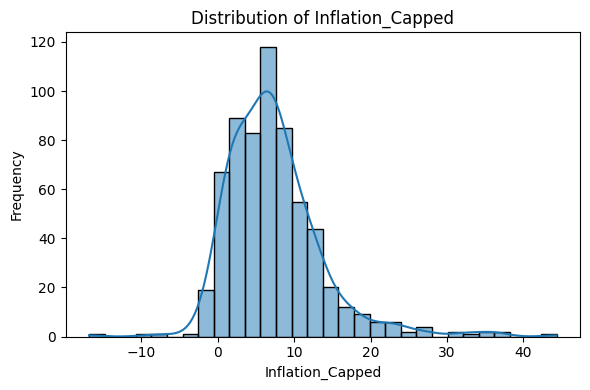

In [55]:
## CHECK DISTRIBUTION OF VARIABLES
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['CPIA_Value', 'log_Wage', 'log_GDP', 'Schooling_Years', 'Inflation_Capped']

for var in variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_merged[var], kde=True, bins=30)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


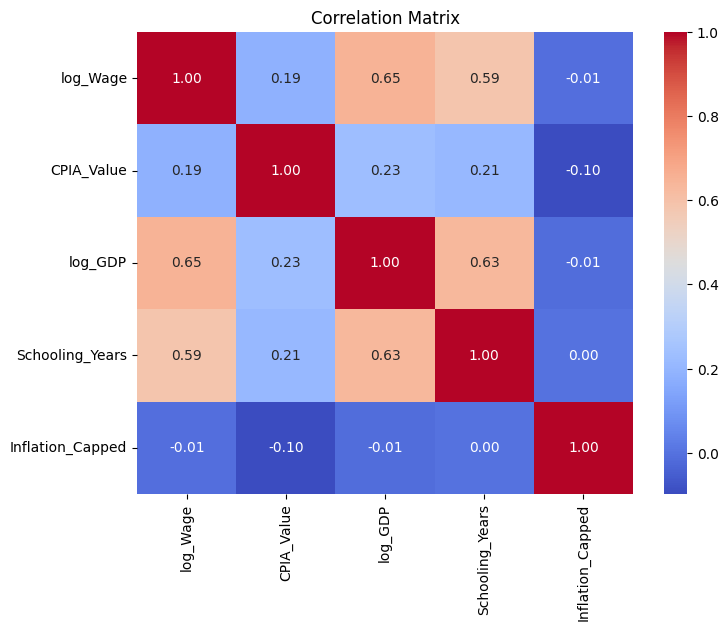

In [56]:
## CHECKING THE CORRELATION MATRIX
import seaborn as sns
import matplotlib.pyplot as plt

# Subset for numeric variables only
correlation_vars = ['log_Wage', 'CPIA_Value', 'log_GDP', 'Schooling_Years', 'Inflation_Capped']

# Compute correlation matrix
corr_matrix = df_merged[correlation_vars].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [57]:
## FIXED EFFECTS REGRESSION

from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Make sure panel index is set correctly
df_merged = df_merged.set_index(["Country Name", "Year"])

# Define model variables
y = df_merged["log_Wage"] 
X = df_merged[["CPIA_Value", "log_GDP", "Schooling_Years", "Inflation_Capped"]]

# Estimate the Fixed Effects model
model_fe = PanelOLS(y, X, entity_effects=True, time_effects=True)
results_fe = model_fe.fit(cov_type="clustered", cluster_entity=True)

# Show results
print(results_fe.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:               log_Wage   R-squared:                        0.0587
Estimator:                   PanelOLS   R-squared (Between):              0.8122
No. Observations:                 631   R-squared (Within):               0.2202
Date:                Thu, May 08 2025   R-squared (Overall):              0.8116
Time:                        15:01:13   Log-likelihood                    819.74
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      8.5995
Entities:                          65   P-value                           0.0000
Avg Obs:                       9.7077   Distribution:                   F(4,552)
Min Obs:                       2.0000                                           
Max Obs:                       11.000   F-statistic (robust):             1.7595
                            